In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D

# Load the data - adjust the path if needed
df = pd.read_csv('shootings.csv')

# Clean the data
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Convert age to numeric
df['flee'] = df['flee'].fillna('Not fleeing')  # Fill NA values in flee
df['body_camera'] = df['body_camera'].map({True: 'Yes', False: 'No'})

([0, 1], [Text(0, 0, 'shot'), Text(1, 0, 'shot and Tasered')])

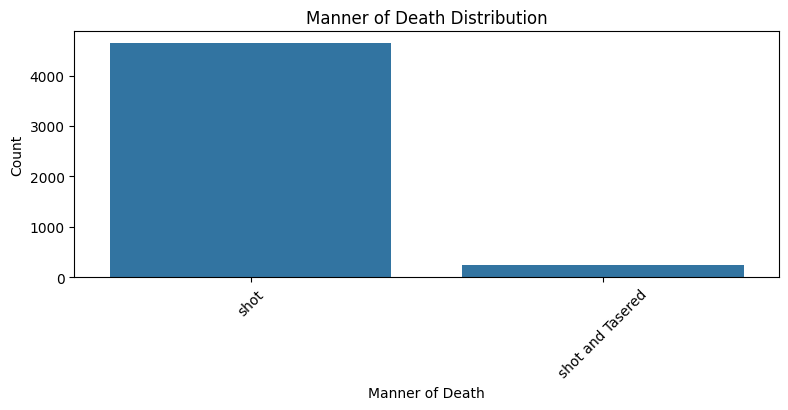

In [4]:
plt.figure(figsize=(20, 30))
gs = GridSpec(8, 2)

# 1. Bar Charts (Categorical vs Count)
# 1.1 Manner of Death vs Count
plt.subplot(gs[0, 0])
manner_counts = df['manner_of_death'].value_counts()
sns.barplot(x=manner_counts.index, y=manner_counts.values)
plt.title('Manner of Death Distribution')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'gun'),
  Text(1, 0, 'knife'),
  Text(2, 0, 'unknown'),
  Text(3, 0, 'unarmed'),
  Text(4, 0, 'toy weapon'),
  Text(5, 0, 'vehicle'),
  Text(6, 0, 'machete'),
  Text(7, 0, 'Taser'),
  Text(8, 0, 'sword'),
  Text(9, 0, 'ax')])

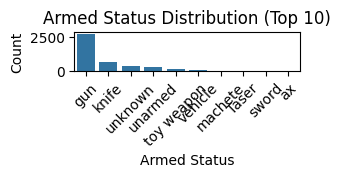

In [7]:
# 1.2 Armed vs Count
plt.subplot(gs[0, 1])
armed_counts = df['armed'].value_counts().head(10)  # Top 10 for readability
sns.barplot(x=armed_counts.index, y=armed_counts.values)
plt.title('Armed Status Distribution (Top 10)')
plt.xlabel('Armed Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

Text(0, 0.5, 'Count')

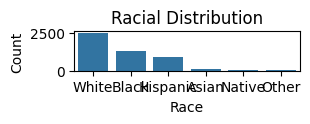

In [8]:
plt.subplot(gs[1, 0])
race_counts = df['race'].value_counts()
sns.barplot(x=race_counts.index, y=race_counts.values)
plt.title('Racial Distribution')
plt.xlabel('Race')
plt.ylabel('Count')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'CA'),
  Text(1, 0, 'TX'),
  Text(2, 0, 'FL'),
  Text(3, 0, 'AZ'),
  Text(4, 0, 'CO'),
  Text(5, 0, 'GA'),
  Text(6, 0, 'OK'),
  Text(7, 0, 'NC'),
  Text(8, 0, 'OH'),
  Text(9, 0, 'WA'),
  Text(10, 0, 'TN'),
  Text(11, 0, 'MO'),
  Text(12, 0, 'LA'),
  Text(13, 0, 'IL'),
  Text(14, 0, 'AL')])

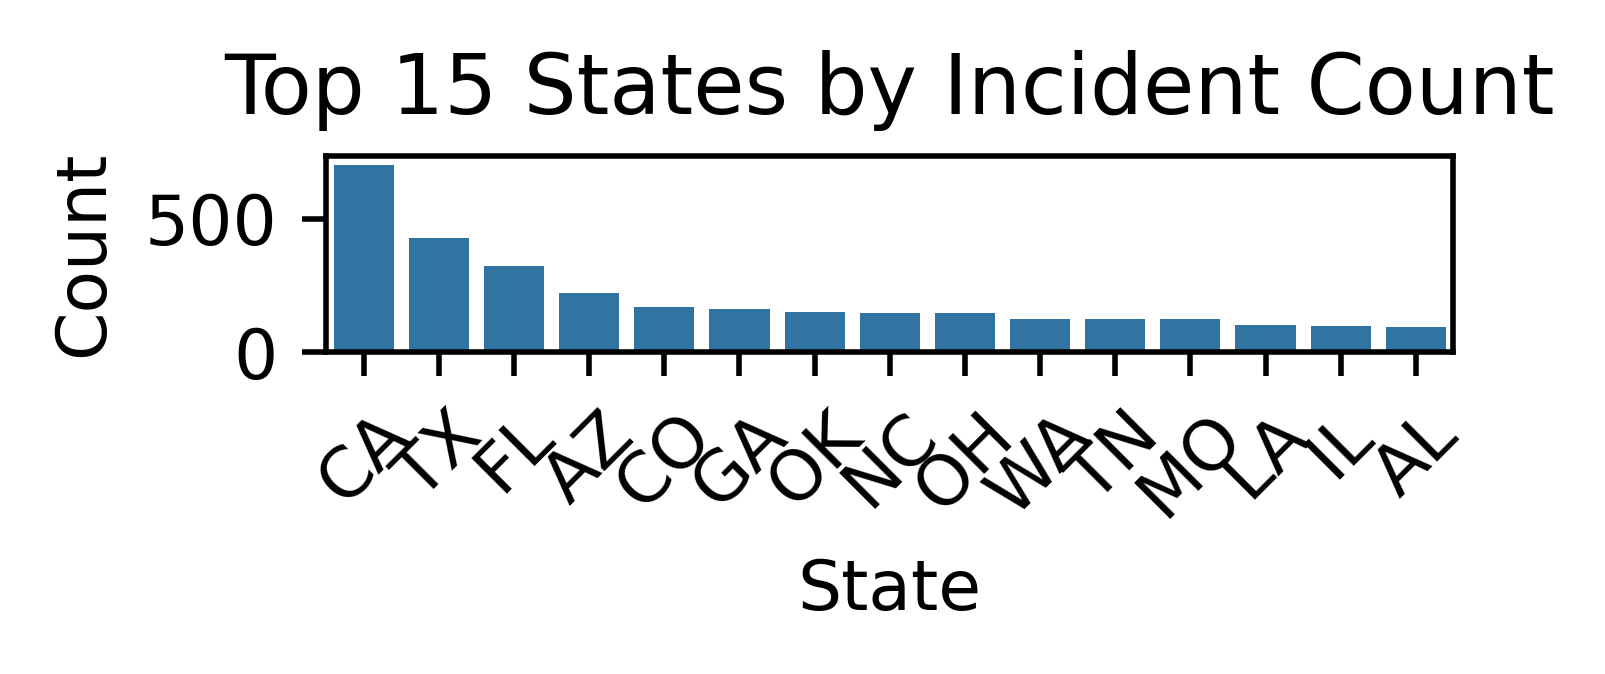

In [10]:
# 1.4 State vs Count
plt.figure(dpi=500)
plt.subplot(gs[1, 1])
state_counts = df['state'].value_counts().head(15)  # Top 15 for readability
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Top 15 States by Incident Count')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)

Text(0, 0.5, 'Count')

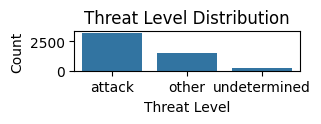

In [11]:
# 1.5 Threat Level vs Count
plt.subplot(gs[2, 0])
threat_counts = df['threat_level'].value_counts()
sns.barplot(x=threat_counts.index, y=threat_counts.values)
plt.title('Threat Level Distribution')
plt.xlabel('Threat Level')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

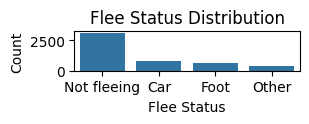

In [12]:
# 1.6 Flee vs Count
plt.subplot(gs[2, 1])
flee_counts = df['flee'].value_counts()
sns.barplot(x=flee_counts.index, y=flee_counts.values)
plt.title('Flee Status Distribution')
plt.xlabel('Flee Status')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

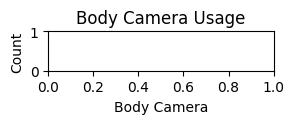

In [13]:
# 1.7 Body Camera vs Count
plt.subplot(gs[3, 0])
camera_counts = df['body_camera'].value_counts()
sns.barplot(x=camera_counts.index, y=camera_counts.values)
plt.title('Body Camera Usage')
plt.xlabel('Body Camera')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

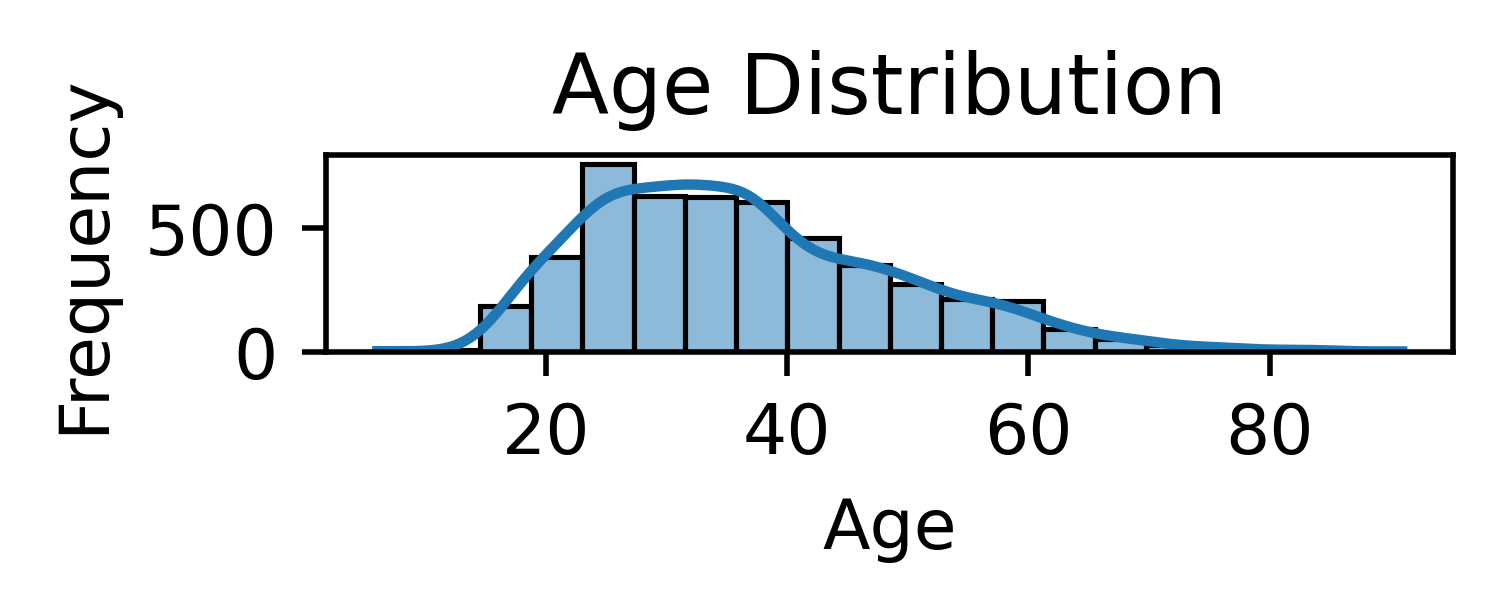

In [15]:
# 2. Histograms (Numerical vs Frequency)
# 2.1 Age Distribution
plt.figure(dpi=500)
plt.subplot(gs[3, 1])
sns.histplot(df['age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

([0, 1], [Text(0, 0, 'shot'), Text(1, 0, 'shot and Tasered')])

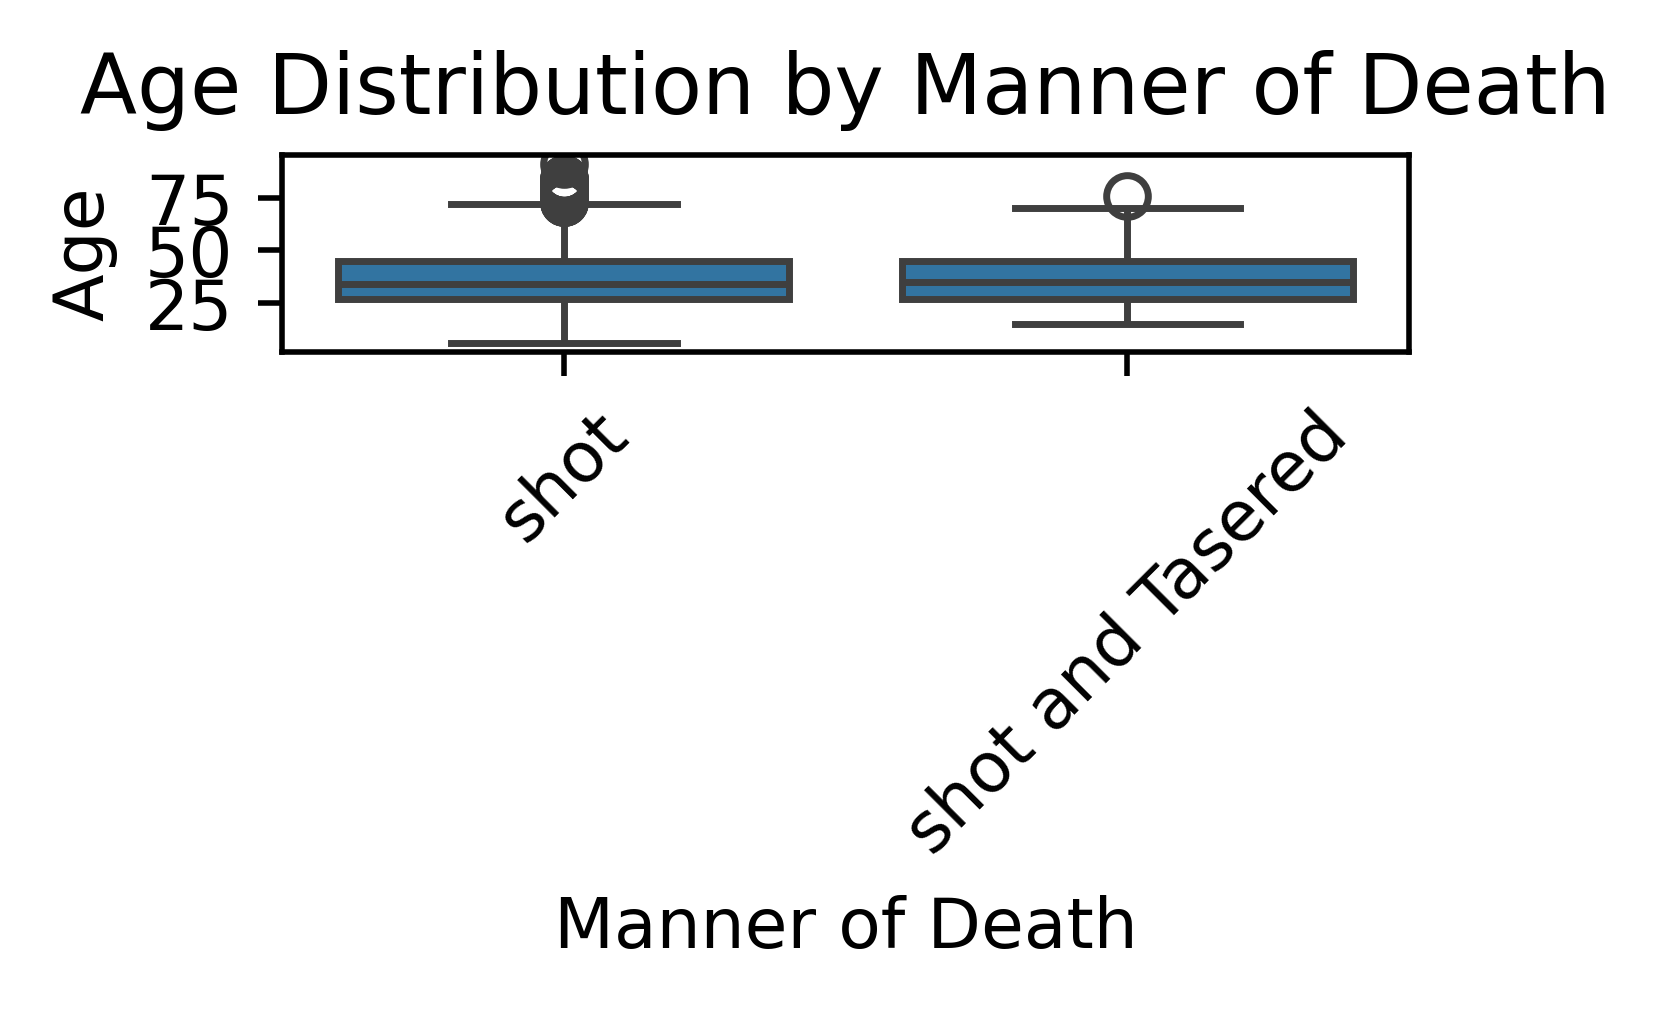

In [17]:
# 3. Box Plots (Categorical vs Numerical)
# 3.1 Age vs Manner of Death
plt.figure(dpi=500)
plt.subplot(gs[4, 0])
sns.boxplot(x='manner_of_death', y='age', data=df)
plt.title('Age Distribution by Manner of Death')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'gun'),
  Text(1, 0, 'unarmed'),
  Text(2, 0, 'toy weapon'),
  Text(3, 0, 'knife'),
  Text(4, 0, 'unknown')])

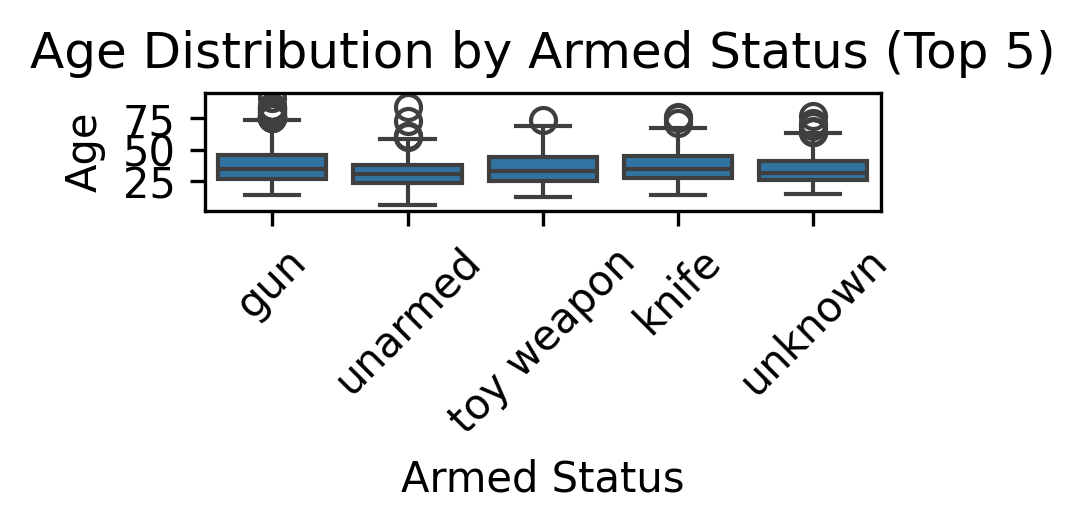

In [19]:
# 3.2 Age vs Armed
plt.figure(dpi=300)
plt.subplot(gs[4, 1])
armed_categories = df['armed'].value_counts().head(5).index  # Top 5 for readability
sns.boxplot(x='armed', y='age', data=df[df['armed'].isin(armed_categories)])
plt.title('Age Distribution by Armed Status (Top 5)')
plt.xlabel('Armed Status')
plt.ylabel('Age')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Asian'),
  Text(1, 0, 'White'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'Black'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Native')])

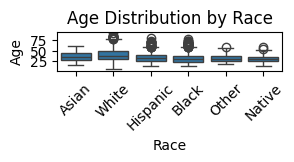

In [20]:
# 3.3 Age vs Race
plt.subplot(gs[5, 0])
sns.boxplot(x='race', y='age', data=df)
plt.title('Age Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Age')
plt.xticks(rotation=45)

Text(0, 0.5, 'Average Age')

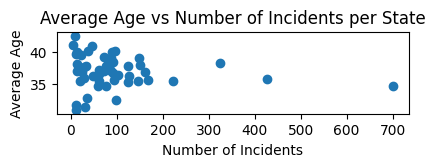

In [22]:
# 4. Scatter Plots (Numerical vs Numerical)
# 4.1 Age vs Number of Incidents per State
plt.figure(figsize=(10,10))
plt.subplot(gs[5, 1])
state_age_avg = df.groupby('state')['age'].mean().reset_index()
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']
state_data = pd.merge(state_age_avg, state_counts, on='state')
plt.scatter(state_data['count'], state_data['age'])
plt.title('Average Age vs Number of Incidents per State')
plt.xlabel('Number of Incidents')
plt.ylabel('Average Age')

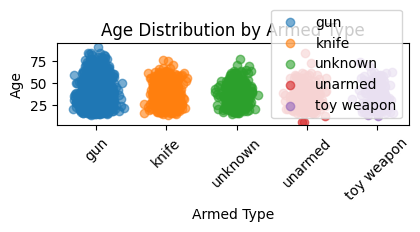

In [23]:
# 4.2 Age vs Armed Type (Categorized Scatter Plot)
plt.figure(figsize=(10,10))
plt.subplot(gs[6, 0])
armed_categories = df['armed'].value_counts().head(5).index
for i, armed_type in enumerate(armed_categories):
    subset = df[df['armed'] == armed_type]
    plt.scatter(np.random.normal(i, 0.1, size=len(subset)), subset['age'], alpha=0.6, label=armed_type)
plt.title('Age Distribution by Armed Type')
plt.xlabel('Armed Type')
plt.ylabel('Age')
plt.xticks(range(len(armed_categories)), armed_categories, rotation=45)
plt.legend()

Text(0.5, 1.0, 'Distribution of Manner of Death')

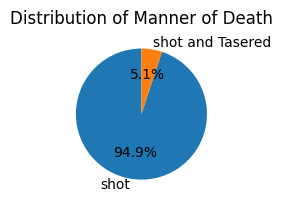

In [25]:
# 5. Pie Charts (Proportions)
# 5.1 Distribution of Manner of Death
plt.figure(figsize=(20,20))
plt.subplot(gs[6, 1])
manner_counts = df['manner_of_death'].value_counts()
plt.pie(manner_counts, labels=manner_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Manner of Death')

Text(0.5, 1.0, 'Proportion of Armed vs Unarmed')

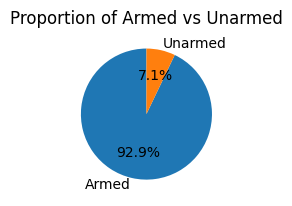

In [26]:
# 5.2 Proportion of Armed vs Unarmed
plt.figure(figsize=(20,20))
plt.subplot(gs[7, 0])
armed_unarmed = df['armed'].apply(lambda x: 'Unarmed' if x == 'unarmed' else 'Armed').value_counts()
plt.pie(armed_unarmed, labels=armed_unarmed.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Armed vs Unarmed')

Text(0.5, 1.0, 'Proportion of Body Camera Use')

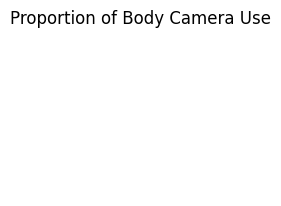

In [27]:
# 5.3 Proportion of Body Camera Use
plt.figure(figsize=(20,20))
plt.subplot(gs[7, 1])
camera_counts = df['body_camera'].value_counts()
plt.pie(camera_counts, labels=camera_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Body Camera Use')

In [28]:
plt.tight_layout()
plt.savefig('police_shootings_analysis.png', dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

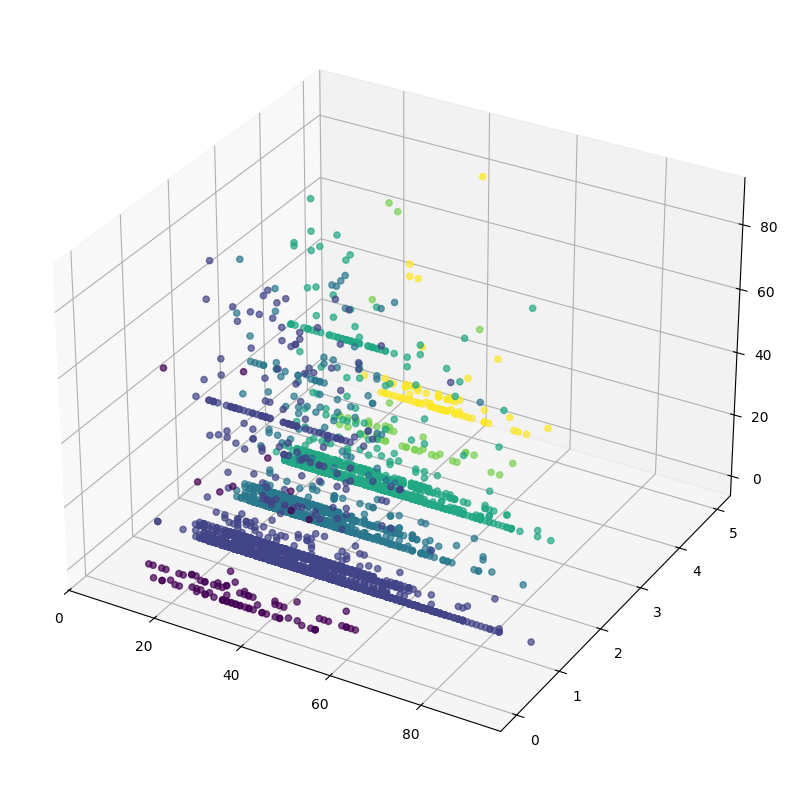

In [29]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create numeric mappings for categorical variables
race_map = {race: i for i, race in enumerate(df['race'].unique())}
armed_map = {armed: i for i, armed in enumerate(df['armed'].unique())}

# Filter data to remove NaNs
filtered_df = df.dropna(subset=['age', 'race', 'armed'])

# Create scatter plot
scatter = ax.scatter(
    filtered_df['age'],
    filtered_df['race'].map(race_map),
    filtered_df['armed'].map(armed_map),
    c=filtered_df['race'].map(race_map),
    cmap='viridis',
    alpha=0.7
)

In [31]:
ax.set_xlabel('Age')
ax.set_ylabel('Race')
ax.set_zlabel('Armed Status')
ax.set_title('3D Visualization of Age, Race, and Armed Status')

# Set y-ticks to show race labels
ax.set_yticks(list(race_map.values()))
ax.set_yticklabels(list(race_map.keys()))

plt.tight_layout()
plt.savefig('3d_visualization.png', dpi=300)


<Figure size 640x480 with 0 Axes>